## Multi-Variable Linear Regression :- Car Price Prediction 

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = 0
    for i in range(m):
        f_wb += np.dot(x[i], w)
    f_wb += b
    
    return f_wb

In [3]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i],w) + b
        total_cost += (f_wb_i - y[i])**2
    
    total_cost = total_cost/(2*m)
    return total_cost

In [4]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = (np.dot(x[i],w) + b - y[i]) 
        for j in range(n):
            dj_dw[j] += f_wb*x[i]
        dj_db += f_wb
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    m,n = x.shape
    j_history = []
    
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 100000:
            j_history.append(cost_function(x, y, w, b))
        
        if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d} : Cost {j_history[-1]:8.2f}")
        
    return w, b, j_history

### Load the data

In [6]:
df = pd.read_csv("./data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# Assuming 'df' is your DataFrame

# Drop irrelevant or redundant columns
columns_to_drop = ['car_ID', 'CarName', 'carlength', 'carwidth', 'carheight']
data = df.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
data


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,2952,ohc,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,3049,ohc,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,3012,ohcv,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,3217,ohc,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
data['fueltype_binary'] = (data['fueltype'] == 'diesel').astype(int)
data.drop()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_binary
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,2952,ohc,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,3049,ohc,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0
202,-1,gas,std,four,sedan,rwd,front,109.1,3012,ohcv,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,3217,ohc,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,1


In [ ]:
# Assuming 'Data' is your DataFrame
data.drop(columns=['fueltype'], inplace=True, errors='raise')

In [19]:
data

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_binary
0,3,std,two,convertible,rwd,front,88.6,2548,dohc,four,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,std,two,convertible,rwd,front,88.6,2548,dohc,four,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,std,four,sedan,fwd,front,99.8,2337,ohc,four,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,2,std,four,sedan,4wd,front,99.4,2824,ohc,five,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,std,four,sedan,rwd,front,109.1,2952,ohc,four,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,0
201,-1,turbo,four,sedan,rwd,front,109.1,3049,ohc,four,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,0
202,-1,std,four,sedan,rwd,front,109.1,3012,ohcv,six,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,0
203,-1,turbo,four,sedan,rwd,front,109.1,3217,ohc,six,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,1


In [20]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [21]:
data['aspiration1'] = (data['aspiration'] == 'std').astype(int)

In [22]:
data.drop(columns = ['aspiration'], inplace = True, errors = 'raise')
data

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_binary,aspiration1
0,3,two,convertible,rwd,front,88.6,2548,dohc,four,130,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,3,two,convertible,rwd,front,88.6,2548,dohc,four,130,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,1,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,2,four,sedan,fwd,front,99.8,2337,ohc,four,109,...,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1
4,2,four,sedan,4wd,front,99.4,2824,ohc,five,136,...,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,four,sedan,rwd,front,109.1,2952,ohc,four,141,...,3.78,3.15,9.5,114,5400,23,28,16845.0,0,1
201,-1,four,sedan,rwd,front,109.1,3049,ohc,four,141,...,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0
202,-1,four,sedan,rwd,front,109.1,3012,ohcv,six,173,...,3.58,2.87,8.8,134,5500,18,23,21485.0,0,1
203,-1,four,sedan,rwd,front,109.1,3217,ohc,six,145,...,3.01,3.40,23.0,106,4800,26,27,22470.0,1,0


In [23]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [24]:
data['doorNo'] = (data['doornumber'] == 'four').astype(int)

In [25]:
data.drop(columns = ['doornumber'], inplace = True, errors = 'raise')
data

,symboling,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_binary,aspiration1,doorNo
0,3,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,...,2.68,9.0,111,5000,21,27,13495.0,0,1,0
1,3,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,...,2.68,9.0,111,5000,21,27,16500.0,0,1,0
2,1,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,...,3.47,9.0,154,5000,19,26,16500.0,0,1,0
3,2,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,...,3.40,10.0,102,5500,24,30,13950.0,0,1,1
4,2,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,...,3.40,8.0,115,5500,18,22,17450.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,sedan,rwd,front,109.1,2952,ohc,four,141,mpfi,...,3.15,9.5,114,5400,23,28,16845.0,0,1,1
201,-1,sedan,rwd,front,109.1,3049,ohc,four,141,mpfi,...,3.15,8.7,160,5300,19,25,19045.0,0,0,1
202,-1,sedan,rwd,front,109.1,3012,ohcv,six,173,mpfi,...,2.87,8.8,134,5500,18,23,21485.0,0,1,1
203,-1,sedan,rwd,front,109.1,3217,ohc,six,145,idi,...,3.40,23.0,106,4800,26,27,22470.0,1,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carbody           205 non-null    object 
 2   drivewheel        205 non-null    object 
 3   enginelocation    205 non-null    object 
 4   wheelbase         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginetype        205 non-null    object 
 7   cylindernumber    205 non-null    object 
 8   enginesize        205 non-null    int64  
 9   fuelsystem        205 non-null    object 
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
 16  highwaympg        205 non-null    int64  
 1

In [27]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [28]:
# One Hot Encoding
dummies = pd.get_dummies(data.carbody)
dummies

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [29]:
merged = pd.concat([data, dummies], axis = 'columns')
merged.head()

,symboling,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,highwaympg,price,fueltype_binary,aspiration1,doorNo,convertible,hardtop,hatchback,sedan,wagon
0,3,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,...,27,13495.0,0,1,0,1,0,0,0,0
1,3,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,...,27,16500.0,0,1,0,1,0,0,0,0
2,1,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,...,26,16500.0,0,1,0,0,0,1,0,0
3,2,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,...,30,13950.0,0,1,1,0,0,0,1,0
4,2,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,...,22,17450.0,0,1,1,0,0,0,1,0


In [30]:
f_data = merged.drop(['carbody', 'wagon'], axis = 'columns')
f_data.head()

,symboling,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,citympg,highwaympg,price,fueltype_binary,aspiration1,doorNo,convertible,hardtop,hatchback,sedan
0,3,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,...,21,27,13495.0,0,1,0,1,0,0,0
1,3,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,...,21,27,16500.0,0,1,0,1,0,0,0
2,1,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,...,19,26,16500.0,0,1,0,0,0,1,0
3,2,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,...,24,30,13950.0,0,1,1,0,0,0,1
4,2,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,...,18,22,17450.0,0,1,1,0,0,0,1


In [31]:
f_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [32]:
dummies = pd.get_dummies(f_data.drivewheel)
dummies.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [35]:
merge = pd.concat([f_data, dummies], axis = 'columns')
merge.head()

,symboling,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,fueltype_binary,aspiration1,doorNo,convertible,hardtop,hatchback,sedan,4wd,fwd,rwd
0,3,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,...,0,1,0,1,0,0,0,0,0,1
1,3,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,...,0,1,0,1,0,0,0,0,0,1
2,1,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,...,0,1,0,0,0,1,0,0,0,1
3,2,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,...,0,1,1,0,0,0,1,0,1,0
4,2,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,...,0,1,1,0,0,0,1,1,0,0


In [37]:
f_data = merge.drop(['drivewheel', '4wd'], axis = 'columns')
f_data.head()

,symboling,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,...,price,fueltype_binary,aspiration1,doorNo,convertible,hardtop,hatchback,sedan,fwd,rwd
0,3,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,...,13495.0,0,1,0,1,0,0,0,0,1
1,3,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,...,16500.0,0,1,0,1,0,0,0,0,1
2,1,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,...,16500.0,0,1,0,0,0,1,0,0,1
3,2,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,...,13950.0,0,1,1,0,0,0,1,1,0
4,2,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,...,17450.0,0,1,1,0,0,0,1,0,0


In [38]:
f_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [39]:
f_data['engine_loc'] = (f_data['enginelocation'] == 'front').astype(int)

In [40]:
f_data.drop(columns = ['enginelocation'], inplace = True, errors = 'raise')
f_data.head()

,symboling,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,...,fueltype_binary,aspiration1,doorNo,convertible,hardtop,hatchback,sedan,fwd,rwd,engine_loc
0,3,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,...,0,1,0,1,0,0,0,0,1,1
1,3,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,...,0,1,0,1,0,0,0,0,1,1
2,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,...,0,1,0,0,0,1,0,0,1,1
3,2,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,...,0,1,1,0,0,0,1,1,0,1
4,2,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,...,0,1,1,0,0,0,1,0,0,1


In [41]:
f_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [42]:
dummies = pd.get_dummies(f_data.enginetype)
dummies.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [43]:
merge = pd.concat([f_data, dummies], axis = 'columns')
merge.head()

,symboling,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,...,fwd,rwd,engine_loc,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,...,0,1,1,1,0,0,0,0,0,0
1,3,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,...,0,1,1,1,0,0,0,0,0,0
2,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,...,0,1,1,0,0,0,0,0,1,0
3,2,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,...,1,0,1,0,0,0,1,0,0,0
4,2,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
f_data = merge.drop(columns = ['l', 'enginetype'], axis = 'columns')
f_data.head()

,symboling,wheelbase,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,...,sedan,fwd,rwd,engine_loc,dohc,dohcv,ohc,ohcf,ohcv,rotor
0,3,88.6,2548,four,130,mpfi,3.47,2.68,9.0,111,...,0,0,1,1,1,0,0,0,0,0
1,3,88.6,2548,four,130,mpfi,3.47,2.68,9.0,111,...,0,0,1,1,1,0,0,0,0,0
2,1,94.5,2823,six,152,mpfi,2.68,3.47,9.0,154,...,0,0,1,1,0,0,0,0,1,0
3,2,99.8,2337,four,109,mpfi,3.19,3.40,10.0,102,...,1,1,0,1,0,0,1,0,0,0
4,2,99.4,2824,five,136,mpfi,3.19,3.40,8.0,115,...,1,0,0,1,0,0,1,0,0,0


In [45]:
f_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [46]:
cylinder_mapping = {'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}

f_data['cylindernumber'] = f_data['cylindernumber'].replace(cylinder_mapping)

print(f_data['cylindernumber'].value_counts())

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64


In [47]:
f_data.head()

,symboling,wheelbase,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,...,sedan,fwd,rwd,engine_loc,dohc,dohcv,ohc,ohcf,ohcv,rotor
0,3,88.6,2548,4,130,mpfi,3.47,2.68,9.0,111,...,0,0,1,1,1,0,0,0,0,0
1,3,88.6,2548,4,130,mpfi,3.47,2.68,9.0,111,...,0,0,1,1,1,0,0,0,0,0
2,1,94.5,2823,6,152,mpfi,2.68,3.47,9.0,154,...,0,0,1,1,0,0,0,0,1,0
3,2,99.8,2337,4,109,mpfi,3.19,3.40,10.0,102,...,1,1,0,1,0,0,1,0,0,0
4,2,99.4,2824,5,136,mpfi,3.19,3.40,8.0,115,...,1,0,0,1,0,0,1,0,0,0


In [48]:
f_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [50]:
dummies = pd.get_dummies(f_data.fuelsystem)
dummies.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [52]:
merge = pd.concat([f_data, dummies], axis = 'columns')
merge.head()

,symboling,wheelbase,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,2548,4,130,mpfi,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,2548,4,130,mpfi,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,2823,6,152,mpfi,2.68,3.47,9.0,154,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,2337,4,109,mpfi,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,2824,5,136,mpfi,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [53]:
f_data = merge.drop(columns = ['fuelsystem', '2bbl'], axis = 'columns')
f_data.head()

,symboling,wheelbase,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,ohcf,ohcv,rotor,1bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,2548,4,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,2548,4,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,2823,6,152,2.68,3.47,9.0,154,5000,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,2337,4,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,2824,5,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [54]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   curbweight        205 non-null    int64  
 3   cylindernumber    205 non-null    int64  
 4   enginesize        205 non-null    int64  
 5   boreratio         205 non-null    float64
 6   stroke            205 non-null    float64
 7   compressionratio  205 non-null    float64
 8   horsepower        205 non-null    int64  
 9   peakrpm           205 non-null    int64  
 10  citympg           205 non-null    int64  
 11  highwaympg        205 non-null    int64  
 12  price             205 non-null    float64
 13  fueltype_binary   205 non-null    int32  
 14  aspiration1       205 non-null    int32  
 15  doorNo            205 non-null    int32  
 16  convertible       205 non-null    uint8  
 1

In [58]:
y_train = f_data['price']
y_train.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [59]:
f_data.drop(columns = ['price'], axis = 'columns')
f_data.head()

,symboling,wheelbase,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,ohcf,ohcv,rotor,1bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,2548,4,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,2548,4,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,2823,6,152,2.68,3.47,9.0,154,5000,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,2337,4,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,2824,5,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [61]:
x_train = f_data.copy()
x_train.head()

,symboling,wheelbase,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,ohcf,ohcv,rotor,1bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,2548,4,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,2548,4,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,2823,6,152,2.68,3.47,9.0,154,5000,...,0,1,0,0,0,0,0,1,0,0
3,2,99.8,2337,4,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,2824,5,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [67]:
x_train.drop(columns = ['price'], inplace = True, axis = 'columns', errors = 'raise')

x_train.shape:- (205, 36)
y_train.shape:- (205,)


In [69]:
print(f"x_train.shape:- {x_train.shape}")
print(f"y_train.shape:- {y_train.shape}")

x_train.shape:- (205, 35)
y_train.shape:- (205,)


In [75]:
x_features = [
    'symboling', 'wheelbase', 'curbweight', 'cylindernumber', 'enginesize',
    'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
    'citympg', 'highwaympg', 'fueltype_binary', 'aspiration1',
    'doorNo', 'convertible', 'hardtop', 'hatchback', 'sedan',
    'fwd', 'rwd', 'engine_loc', 'dohc', 'dohcv', 'ohc', 'ohcf', 'ohcv',
    'rotor', '1bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'
]

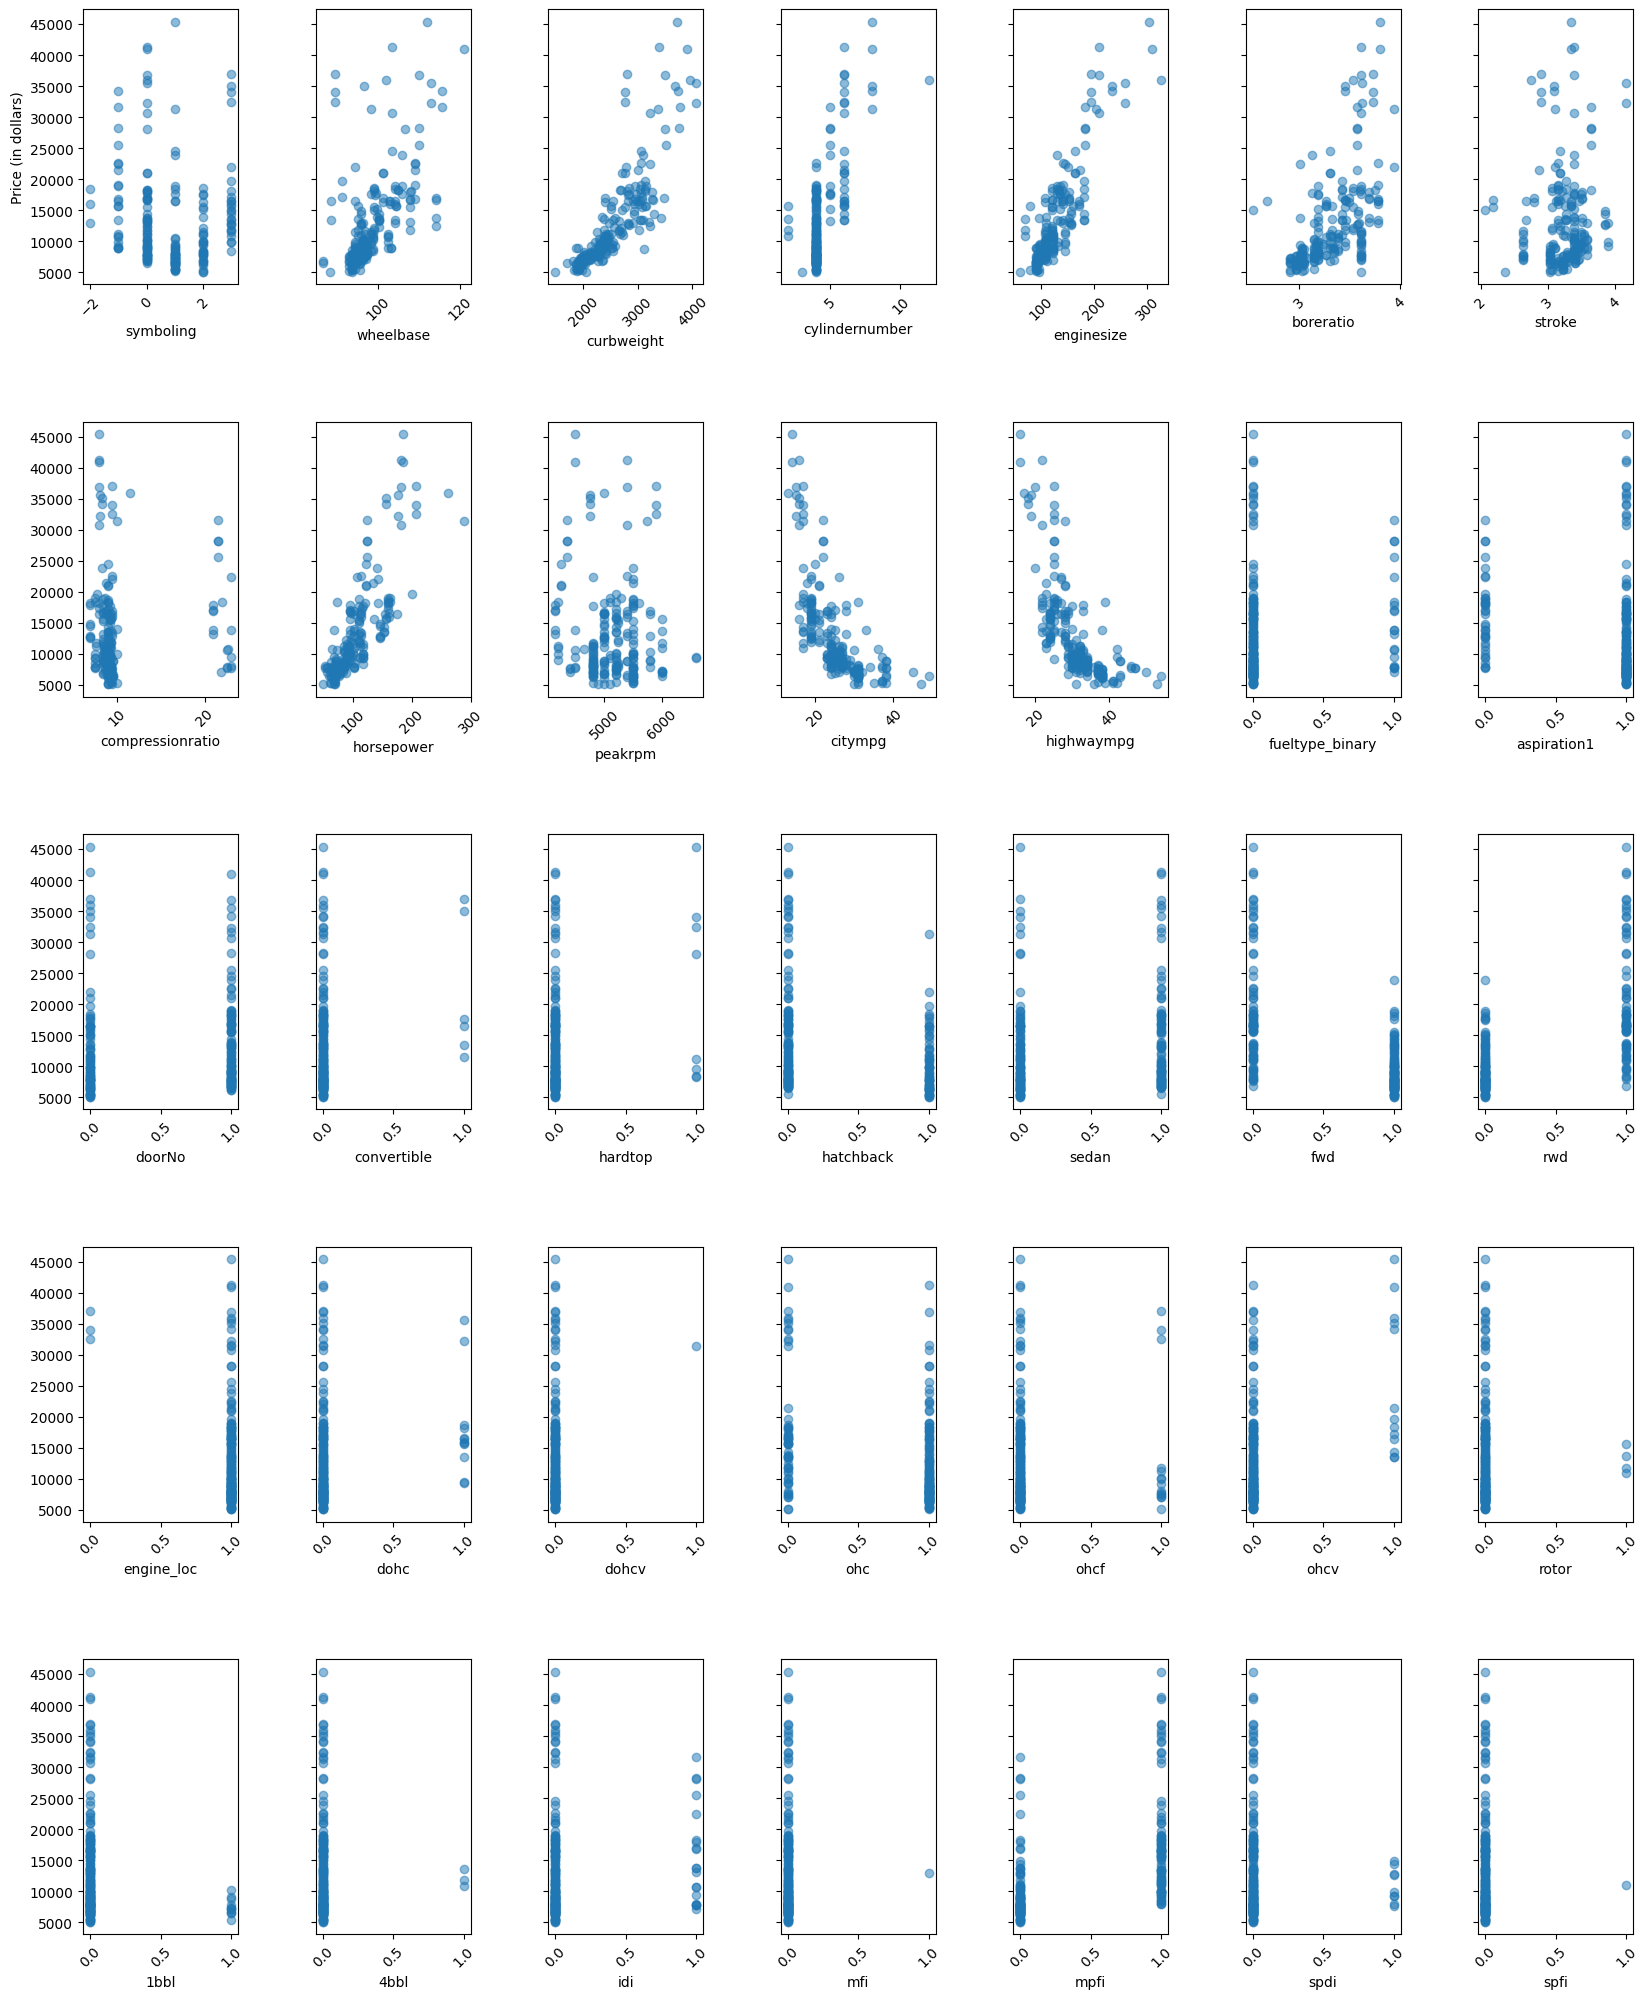

In [79]:
import math

# Calculate the number of rows and columns based on the desired layout
num_cols = 7  # You can adjust this based on how many columns you want
num_rows = math.ceil(len(x_features) / num_cols)

# Create the subplot grid
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), sharey=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the horizontal and vertical space between subplots

# Flatten the 2D array of subplots into a 1D array for easy indexing
ax = ax.flatten()

# Assuming 'x_train' is your DataFrame and 'y_train' is your target variable
for i in range(len(x_features)):
    ax[i].scatter(x_train[x_features[i]], y_train, marker='o', alpha=0.5)  # Use a circular marker with transparency
    ax[i].set_xlabel(x_features[i])
    ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any empty subplots if the total number of subplots is not a multiple of num_cols * num_rows
for j in range(len(x_features), len(ax)):
    fig.delaxes(ax[j])

ax[0].set_ylabel("Price (in dollars)")
plt.show()
